## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
combined_df['Mouse ID'].count()

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_based_on_ID_and_Timepoint = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
duplicated_based_on_ID_and_Timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.drop_duplicates(subset = ['Mouse ID','Timepoint'],inplace = True)

In [9]:
# Checking the number of mice in the clean DataFrame.
combined_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [10]:
combined_df.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_regimen = combined_df.groupby('Drug Regimen')
# This method produces everything in a single groupby function
mean_tumor_vol = grouped_by_regimen['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped_by_regimen['Tumor Volume (mm3)'].median()
variance_tumor_vol = grouped_by_regimen['Tumor Volume (mm3)'].var()
std_tumor_vol = grouped_by_regimen['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped_by_regimen['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean":mean_tumor_vol,
                          "Median":median_tumor_vol,
                          "Variance":variance_tumor_vol,
                          "STD":std_tumor_vol,
                          "SEM":sem_tumor_vol})
summary_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

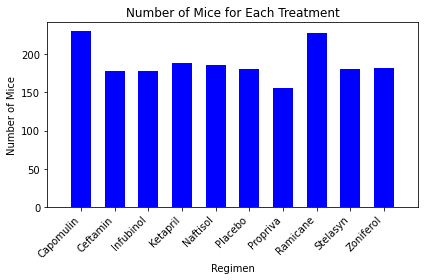

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
grouped_by_regimen['Mouse ID'].count().plot(kind = 'bar',width = 0.6, color = 'blue')
plt.title('Number of Mice for Each Treatment')
plt.xlabel('Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation = 45,horizontalalignment = 'right')
plt.xlim(-1,len(combined_df['Drug Regimen'].unique()))
plt.tight_layout()


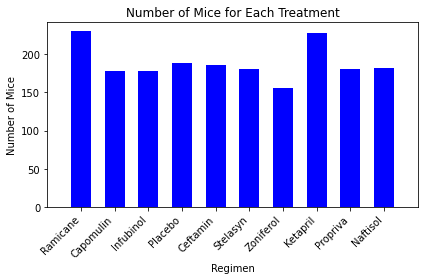

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = combined_df['Drug Regimen'].unique()
y_axis = grouped_by_regimen['Mouse ID'].count()

plt.bar(x_axis,y_axis,width = 0.6, color = 'blue')
plt.title('Number of Mice for Each Treatment')
plt.xlabel('Regimen')
plt.ylabel('Number of Mice')
plt.xlim(-1,len(combined_df['Drug Regimen'].unique()))
plt.xticks(rotation = 45,horizontalalignment = 'right')
plt.tight_layout()
plt.show()

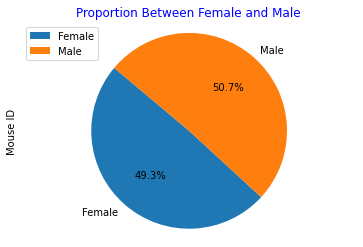

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_by_sex = combined_df.groupby('Sex')
sex_list = grouped_by_sex['Sex'].count().keys()
grouped_by_sex['Mouse ID'].count().plot(kind = 'pie',autopct = '%1.1f%%',startangle = 140)
plt.axis("equal")
plt.title('Proportion Between Female and Male',color = 'blue')
plt.legend()

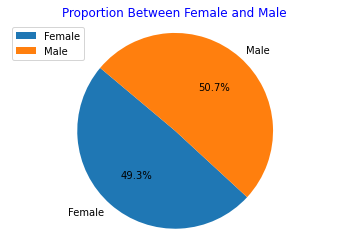

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(grouped_by_sex['Mouse ID'].count(),labels = sex_list, autopct = '%1.1f%%',startangle = 140)
plt.axis("equal")
plt.title('Proportion Between Female and Male',color = 'blue')
plt.legend()

In [17]:
grouped_by_sex['Mouse ID'].count()

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

## Quartiles, Outliers and Boxplots

In [18]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_by_mouse = combined_df.groupby('Mouse ID')
last_timepoint_eachmouse = grouped_by_mouse['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_lastpoint = pd.merge(combined_df,last_timepoint_eachmouse,how='inner',on='Mouse ID')
merge_lastpoint.rename(columns={'Timepoint_y':'Final Timepoint','Timepoint_x':'Timepoint'},inplace = True)
merge_lastpoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)    
final_tumor = []

for treatment in treatments_list:
    final_tumor.append(merge_lastpoint.loc[(merge_lastpoint['Drug Regimen']==treatment)&(merge_lastpoint['Timepoint']==merge_lastpoint['Final Timepoint']),'Tumor Volume (mm3)'])
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    
    # add subset 
Capomulin_quartiles = final_tumor[0].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr =  Capomulin_upperq -  Capomulin_lowerq

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_lowerq + (1.5*Capomulin_iqr)


Ramicane_quartiles = final_tumor[1].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr =  Ramicane_upperq -  Ramicane_lowerq

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_lowerq + (1.5*Ramicane_iqr)


Infubinol_quartiles = final_tumor[2].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr =  Infubinol_upperq -  Infubinol_lowerq

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_lowerq + (1.5*Infubinol_iqr)


Ceftamin_quartiles = final_tumor[3].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr =  Ceftamin_upperq -  Ceftamin_lowerq

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_lowerq + (1.5*Ceftamin_iqr)


    # Determine outliers using upper and lower bounds
print(f"Values below {Capomulin_lower_bound} could be Capomulin outliers.")
print(f"Values above {Capomulin_upper_bound} could be Capomulin outliers.")
print('\n')
print(f"Values below {Ramicane_lower_bound} could be Ramicane outliers.")
print(f"Values above {Ramicane_upper_bound} could be Ramicane outliers.")
print('\n')
print(f"Values below {Infubinol_lower_bound} could be Infubinol outliers.")
print(f"Values above {Infubinol_upper_bound} could be Infubinol outliers.")
print('\n')
print(f"Values below {Ceftamin_lower_bound} could be Ceftamin outliers.")
print(f"Values above {Ceftamin_upper_bound} could be Ceftamin outliers.")




Values below 20.70456164999999 could be Capomulin outliers.
Values above 44.05015203000001 could be Capomulin outliers.


Values below 17.912664470000003 could be Ramicane outliers.
Values above 45.20827463 could be Ramicane outliers.


Values below 36.83290494999999 could be Infubinol outliers.
Values above 71.26431043 could be Infubinol outliers.


Values below 25.355449580000002 could be Ceftamin outliers.
Values above 72.08870612 could be Ceftamin outliers.


([<matplotlib.axis.XTick at 0x7fc908020b00>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin')])

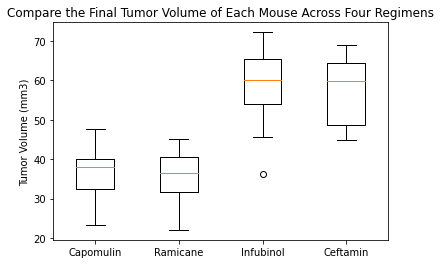

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(final_tumor)
plt.title('Compare the Final Tumor Volume of Each Mouse Across Four Regimens')
plt.ylabel('Tumor Volume (mm3)')
tick_loc = np.arange(1,5,1)
plt.xticks(tick_loc,treatments_list)

## Line and Scatter Plots

In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin',['Mouse ID','Weight (g)','Timepoint','Tumor Volume (mm3)']]

In [58]:
Capomulin_df.groupby('Mouse ID')
mouse_id = input('Which mouse would you like to check?')

Which mouse would you like to check? s185


(23.34359787, 45.0)

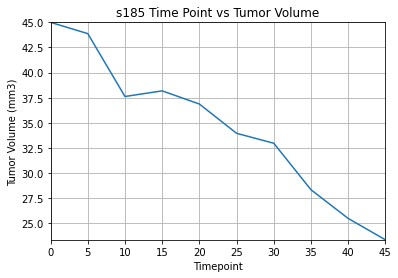

In [59]:
x_axis = Capomulin_df.loc[Capomulin_df['Mouse ID']==mouse_id,'Timepoint']
y_axis = Capomulin_df.loc[Capomulin_df['Mouse ID']==mouse_id,'Tumor Volume (mm3)']
plt.plot(x_axis,y_axis)
plt.title(f'{mouse_id} Time Point vs Tumor Volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_by_weight = Capomulin_df.groupby('Weight (g)')

(14.0, 26.0)

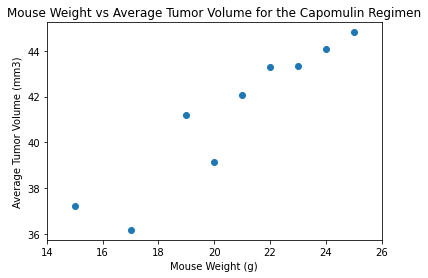

In [70]:
x_axis_weight = Capomulin_df['Weight (g)'].unique()
y_axis_volume = grouped_by_weight['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis_weight,y_axis_volume)
plt.title('Mouse Weight vs Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(Capomulin_df['Weight (g)'].min()-1,Capomulin_df['Weight (g)'].max()+1)


## Correlation and Regression

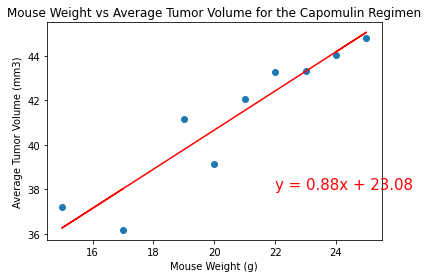

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
x_values = x_axis_weight
y_values = y_axis_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,38),fontsize=15,color="red")
plt.title('Mouse Weight vs Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [67]:
print('Observations:\n')
print('The numbers of mouses in these 10 regimens are close to 175. Ramicane and Ketapril are over 200.\n')

print('The proportion of mouse sex in these tests is approximately equal.\n')

print('Compared with Infubinol and Ceftamin, Capomulin and Ramicane has relatively smaller median of tumor volume at final timepoint.\n')

print('Regarding Capomulin regimen, it shows that mouse weight and average tumor volume has strong positive correlationship.')

Observations:

The numbers of mouses in these 10 regimens are close to 175. Ramicane and Ketapril are over 200.

The proportion of mouse sex in these tests is approximately equal.

Compared with Infubinol and Ceftamin, Capomulin and Ramicane has relatively smaller median of tumor volume at final timepoint.

Regarding Capomulin regimen, it shows that mouse weight and average tumor volume has strong positive correlationship.
